# Artificial Neural Networks Approach to Track a Breast Cancer Tumor Evolution using Antenna 

#  Creating a Multi-output Regersor with Keras  (Artificial Neural Network, ANN) Breast_Cancer_2 

Roadmap 

we should draw up a quick roadmap before we start programming to keep us on course. Once we have a problem and model in mind, the following phases serve as the foundation for any machine learning approach:
1.	Ask the question and select the necessary information

2.	Setting up the environment so that each model's code can be written. Import the Skill-Learn and Keras libraries, respectively, for random forest and neural networks.Identify and correct missing data points/anomalies as required

3.	Get the information ready for the machine learning model.

4.	Use the training data to train the model.

5.	Make predictions on the test data

6.	Calculate performance metrics and compare forecasts to the targets in the known test set.

7.	If performance is subpar, modify the model, get new data, or attempt a different modeling approach.

8.	Interpret model and report results visually and numerically
Step 1 has already been completed! Can we forecast the tumor size and location? is what we're asking. And the datasets were extracted in order to achieve this purpose, as was described in the second chapter in doc.

__Practically speaking, the machine learning process starts with gathering data for estimating the size and location of a malignant tumour in three-axis ( Tx , Ty, and Tz). As previously mentioned, this data will be extracted from electromagnetic waves received by a receiving antenna (located outside the breast), as the data includes electrical measured quantities like (Transmitted power, Gain, Radiation Efficiency,voltage,current, impedance)__. 

discrbtion of the dataset :
-	Transmitted power: The amplitude, intensity, or total power of a transmitted wave in relation to an incident wave is described by a transmission coefficient.

-	-Gain: The gain of a receiving antenna indicates how effectively the antenna transforms radio waves coming from a specific direction into electrical power.

-	-Radiation Efficiency: In a receiving antenna, it refers to the percentage of the radio wave's power that is actually supplied as an electrical signal after being intercepted by the antenna.

-	Voltage: The difference in electric potential between two places is often referred to as electric pressure, electric tension, or (electric) potential difference. and is easily measurable.

-	Current: An electric current is a flow of positively or negatively charged particles, such as electrons or ions, that travels through an electrical conductor or a vacuum. The net rate of flow of electric charge through a surface or into a control volume is used to calculate it.

-	Impedance An object's electrical resistance is a measurement of how easily an electric current travels through it.

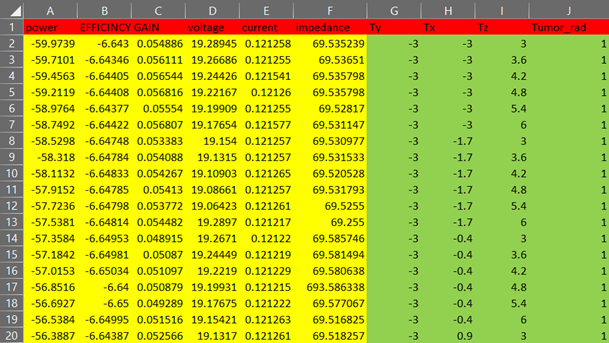

_____In order to evaluate the project and to generalize its credibility, in this section, the artificial neural network (ANN) was presented as another model to test the secound dataset Breast_Cancer_2  . The neural network based on deep learning participates in a number of analytical steps used in Random Forest, such as the method of reading data, exploring it, sorting it into inputs and outputs, and splitting it into data training and testing so there is no need to repeat these steps____

# Import: 

 the first step is importing all the Python dependencies that we need. We will use four packages: 
 
1- Pandas and Numpy for read the dataset and handling with dataset
 
2- sklearn, primarily for data preprocessing related activities, and tensorflow, for the Neural network. From sklearn, we import train_test_split - allowing us to split the data into a training and testing dataset, and for scaling the data. In addation, sklearn provide a different performance measurments methods such as mean_squared_error and R^2 (sm). From tensorflow, we will use the Sequential API for constructing our Neural Network, using Dense (i.e. densely-connected) layers. For visualizing , from matplotlib will use plot function in order to plot the val_loss and train_loss curves to evaluate the performance. We use Mean squared error for computing loss and Adam for optimization.

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import sklearn.metrics as sm

# Importing 

2- Importing , Explore the Datasets, Identify Anomalies, Missing Data, Features and Targets and Convert Data to Arrays : all of these steps have been done and presented in the random forest modelز

3- use the data.info() and data.head()  to give a full detail about the type of datasets used and to give a broad overview of its size in terms of the number of features and samples 

4- It can be seen from the info function print it consists of three features ( power, EFFICINCY, GAIN, voltage, current,impedance) and 199 samples, while there is four output targets (Tx, Ty,and Tz) , and this proves our claim. 
 Also we have 199 rows and 10 cloumns 

In [20]:
#The secound dataset with 6-feature 
# This data is adopted to enhance the model performance and accuracy. 
data = pd.read_csv('Breast_Cancer_2.csv')

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   power      199 non-null    float64
 1   EFFICINCY  199 non-null    float64
 2   GAIN       199 non-null    float64
 3   voltage    199 non-null    float64
 4   current    199 non-null    float64
 5   impedance  199 non-null    float64
 6   Ty         199 non-null    float64
 7   Tx         199 non-null    float64
 8   Tz         199 non-null    float64
 9   Tumor_rad  199 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 15.7 KB


In [22]:
data.head()

,power,EFFICINCY,GAIN,voltage,current,impedance,Ty,Tx,Tz,Tumor_rad
0,-59.973928,-6.643001,0.054886,19.289455,0.121258,69.535239,-3.0,-3.0,3.0,1
1,-59.710135,-6.643465,0.056111,19.266858,0.121255,69.536510,-3.0,-3.0,3.6,1
2,-59.456334,-6.644046,0.056544,19.244261,0.121541,69.535798,-3.0,-3.0,4.2,1
3,-59.211927,-6.644083,0.056816,19.221672,0.121260,69.535798,-3.0,-3.0,4.8,1
4,-58.976370,-6.643765,0.055540,19.199095,0.121255,69.528170,-3.0,-3.0,5.4,1


In [23]:
print(data.duplicated().sum(0))

0


In [24]:
print(data.isnull().sum(0))

power        0
EFFICINCY    0
GAIN         0
voltage      0
current      0
impedance    0
Ty           0
Tx           0
Tz           0
Tumor_rad    0
dtype: int64


Furthermore, by closely looking at the results, all of the data points are floats, so there is no categorical data and, therefore, no need to use one of the encoder methods.

# Features and Targets Selection

1- Now, it need to separate the data into the features and targets 

2-The target, also known as the label, is the value we want to predict, in this case the actual tumor size\radius (Tumor_rad) and its location in three coordinates (Tx, Ty,and Tz) , the last four

3- the features are all the rows and the first six cloumns  the model uses to make a prediction From 0 to 6

In [25]:
# Features ( Input)
X = data.iloc[:,0:6]
print(X)

         power  EFFICINCY      GAIN    voltage   current  impedance
0   -59.973928  -6.643001  0.054886  19.289455  0.121258  69.535239
1   -59.710135  -6.643465  0.056111  19.266858  0.121255  69.536510
2   -59.456334  -6.644046  0.056544  19.244261  0.121541  69.535798
3   -59.211927  -6.644083  0.056816  19.221672  0.121260  69.535798
4   -58.976370  -6.643765  0.055540  19.199095  0.121255  69.528170
..         ...        ...       ...        ...       ...        ...
194 -51.325375  -6.324139  0.053843  19.152067  0.121485  69.381481
195 -51.288984  -6.323623  0.053551  19.129782  0.121483  69.393850
196 -51.251767  -6.323697  0.052834  19.107539  0.121484  69.387462
197 -51.213743  -6.323787  0.054208  19.279441  0.121484  69.324895
198 -51.174935  -6.319083  0.056154  19.279569  0.121488  69.324858

[199 rows x 6 columns]


In [26]:
# Targets (Output)
y = data.iloc[:,6:10]
print(y)

      Ty   Tx   Tz  Tumor_rad
0   -3.0 -3.0  3.0          1
1   -3.0 -3.0  3.6          1
2   -3.0 -3.0  4.2          1
3   -3.0 -3.0  4.8          1
4   -3.0 -3.0  5.4          1
..   ...  ...  ...        ...
194  3.0 -0.4  4.2          1
195  3.0 -0.4  4.8          1
196  3.0 -0.4  5.4          1
197  3.0 -0.4  6.0          1
198  3.0  0.9  3.0          1

[199 rows x 4 columns]


# Convert Data to Arrays

We will also convert the Pandas data frames to Numpy arrays because that is the way the algorithm works using value

In [27]:
X = data.iloc[:,0:6].values
y = data.iloc[:,6:10].values


# Data Scaling

The scaling step is one of the most important steps in creating neural networks, where the creation of weights for entries depends largely on scaling . To this end, and after selecting the features and targets, we scale them to a range between (-1 and 1), using StandardScaler and fit it .By doing so, the overall datasets are scaled

In [28]:
sc = StandardScaler()
X = sc.fit_transform(X)
print(X)

[[-3.55085127 -0.31984246 -0.23857075  1.39263024 -0.07106691 -0.06605108]
 [-3.41709949 -0.32020297  0.16913274  1.0848961  -0.07106691 -0.06602242]
 [-3.28841446 -0.32065498  0.31319221  0.77717748 -0.0710669  -0.06603847]
 ...
 [ 0.87156552 -0.07143194 -0.9210858  -1.0847203  -0.07106691 -0.06938229]
 [ 0.89084443 -0.07150154 -0.46389623  1.25625864 -0.07106691 -0.07079269]
 [ 0.9105216  -0.06784234  0.18324044  1.25800176 -0.07106691 -0.07079352]]


# Train/test split

Sklearn allows you to manually specify the dataset to use for validation\testing during training. After generating the dataset, we must create a split between training and testing data. Scikit-learn also provides a nice function for this: train_test_split. Since both datasets are small, so in this project we convert X and y into its training and testing components with a 90/10 train/test split -It is worth noting that the random state here is one of the optimization elements that can be changed randomly depending on achieving good performance of the model. According to the public domain, Random State is determined to 0

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size = 0.1, random_state =0)

# Prepare the Neural Network Architecture

1- The next step here is creating the model using an instance of the Sequential API. Using model.add, we then stack multiple densely-connected (Dense) layers on top. Recall from the above that in a Dense layer, each neuron in a layer connects to all the other neurons in the previous layer. This means that they will become aware of certain patterns in any of the upstream neurons, if they fire.

2- The Input layer has the argument “input_dim” as an input dimensions, as the shape must equal the input data. As mentioned before, we has six features, then the value of input_dim is equal to 6.

3- The hidden layers : The six-inputs of the first dataset here are pass through four hidden layers, which were chosen after some trial and error . Our Dense layers will become has a narrower neurons when we get closer to the output layer. This allows us to detect many patterns therefore the performance of the model will increase . If you wonder how I got to the number of neurons in the hidden layers, I conducted several experiments and found that this number leads to good results in terms of the error and accuracy. Therefore, the first , second , third, and forth are designed with 128, 64,32, and 16 neurons respectively . As is common, we use ReLU as an activations function

4- The output layer: In our project we have a multi-output regresor , a task that has four output variables (the size of the malignant tumor, and its location in the three axis) will require a regresor neural network output layer with four nodes in the output layer, each with the linear (default) activation function. Therefore, the argument “n_output” is defined as an output dimensions, as the value of this argument equal to 4.

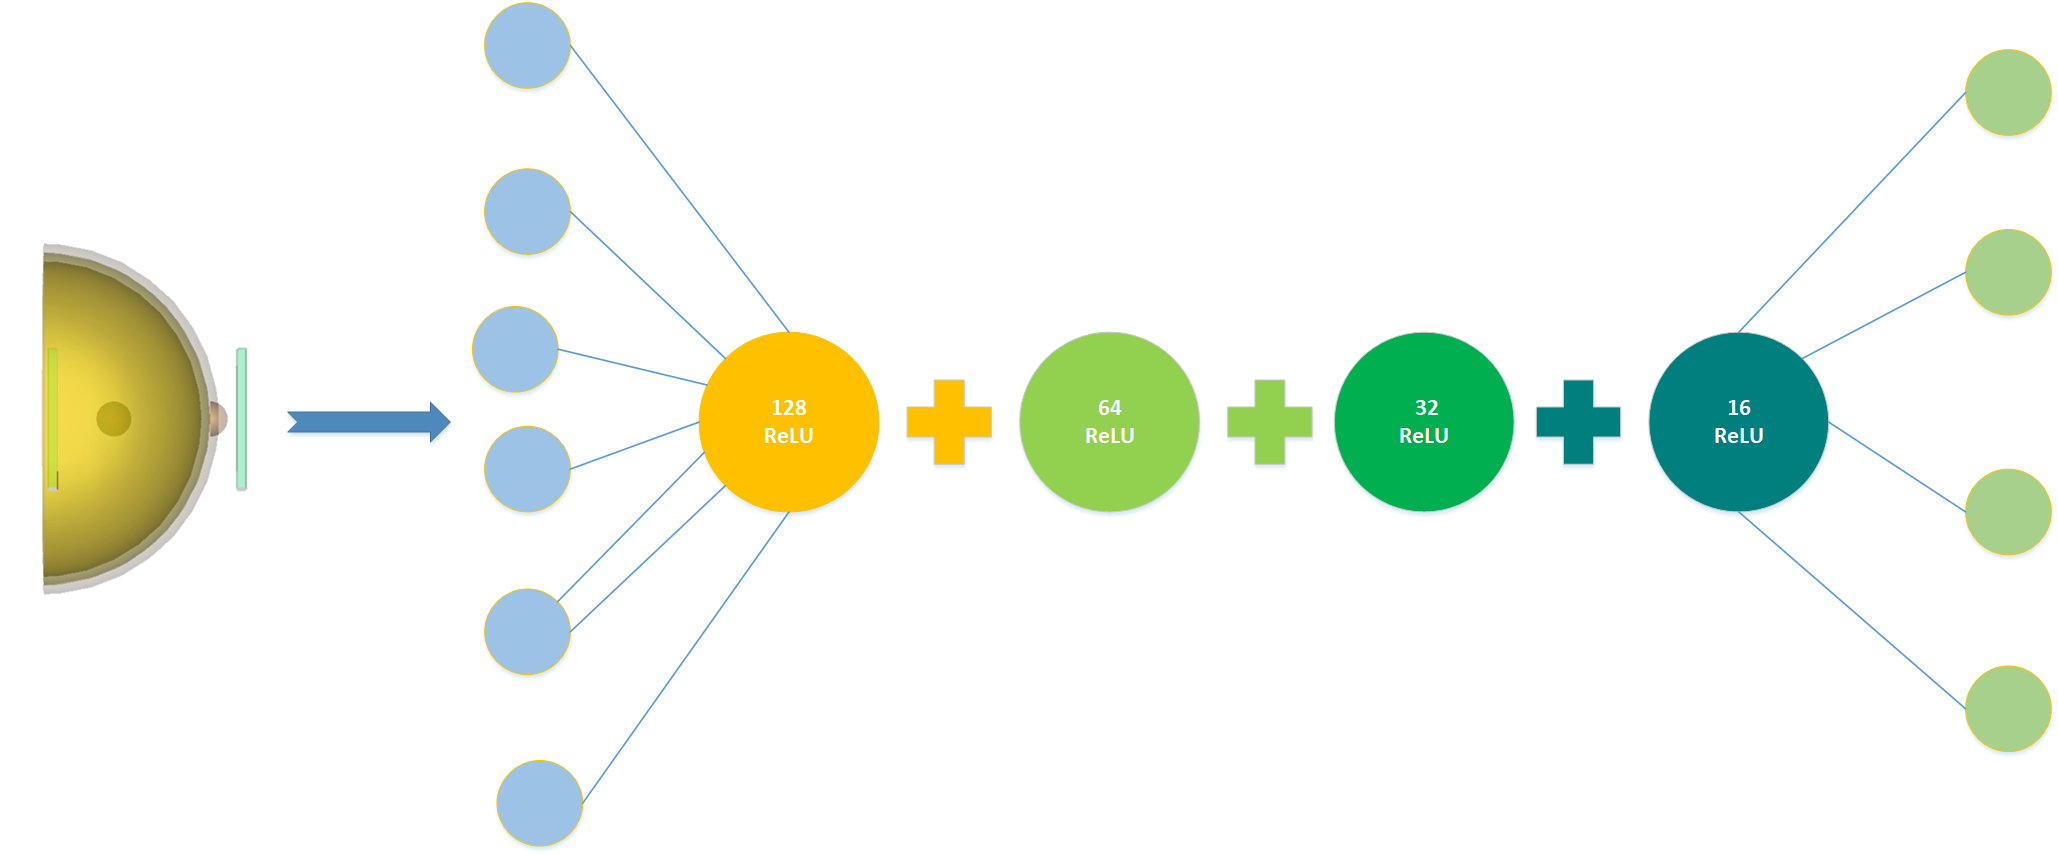

In [30]:
n_outputs=4
model = Sequential() 
# Defining the Input layer and FIRST hidden layer.
model.add(Dense(units=128, input_dim=6, activation='relu'))
# Defining the Second layer of the model
model.add(Dense(units=64, activation='relu'))
# Defining the Therd layer of the model
model.add(Dense(units=32, activation='relu'))
# Defining the Forth layer of the model
model.add(Dense(units=16,activation='relu'))  
# The output neurons are a four-fully connected node 
model.add(Dense(n_outputs)) 

# Compiling the model

We then convert the model  selection  that we have just created into a true model. Using mean squared error (MSE) as loss function (which can be used in effectively the number of multi-output regression tasks) and the Adam optimizer, we instantiate the model

In [31]:
model.compile(loss='mse', optimizer='adam')

# Training the model


We then fit the training data to the model and provide a few configuration options defined earlier. The model will now start training

In [32]:
history = model.fit(X_train, Y_train, epochs=2000, batch_size=20, validation_data=(X_test, Y_test))

Epoch 1/2000
9/9 [==============================] - 1s 24ms/step - loss: 7.3454 - val_loss: 6.4710
Epoch 2/2000
9/9 [==============================] - 0s 6ms/step - loss: 6.4487 - val_loss: 5.3984
Epoch 3/2000
9/9 [==============================] - 0s 6ms/step - loss: 5.2375 - val_loss: 4.0173
Epoch 4/2000
9/9 [==============================] - 0s 6ms/step - loss: 3.9320 - val_loss: 2.8767
Epoch 5/2000
9/9 [==============================] - 0s 7ms/step - loss: 3.0189 - val_loss: 2.5209
Epoch 6/2000
9/9 [==============================] - 0s 5ms/step - loss: 2.6642 - val_loss: 2.3364
Epoch 7/2000
9/9 [==============================] - 0s 8ms/step - loss: 2.3452 - val_loss: 2.1187
Epoch 8/2000
9/9 [==============================] - 0s 7ms/step - loss: 2.1732 - val_loss: 1.9382
Epoch 9/2000
9/9 [==============================] - 0s 5ms/step - loss: 2.0453 - val_loss: 1.8700
Epoch 10/2000
9/9 [==============================] - 0s 6ms/step - loss: 1.9536 - val_loss: 1.8198
Epoch 11/2000
9/9 

# Evaluating the model

After the model is trained, we can evaluate it using model. Predict. Based on the testing dataset, we then know how well it performs when it is used on data that it has never seen before

In [33]:
Y_pred= model.predict(X_test)


1/1 [==============================] - 0s 101ms/step


# Model Performance Measurement


As mentioned before, Testing When you have your model trained and tuned, it is time to test its final performance.So you can use all the regression metrics to assess its result. For example, you might use MAE, MSE, MASE, RMSE, MAPE, SMAPE, and others. However, from my experience, MAE and MSE are the most commonly used. Both of them will be a good fit to evaluate the model’s performance. So, if you use them, keep in mind that the less is your error, the better and the error of the perfect model will be equal to zero. For accuracy measurements, R^2 can be used to present the performance of the model out of 100%

In [34]:
print("Mean absolute error =", round(sm.mean_absolute_error(Y_test, Y_pred), 2)) 
print("Mean squared error =", round(sm.mean_squared_error(Y_test, Y_pred), 2))
print("Accuracy", round(sm.r2_score(Y_test, Y_pred), 2))

Mean absolute error = 0.32
Mean squared error = 0.35
Accuracy 0.57


# showing off

It is also noted that the performance of the model and the accuracy have improved significantly compared to the first six data, and this proves our claim that increasing the features improves the performance and accuracy, which makes this work reliable, correct and reliable, as the increase in the data in the future can raise the accuracy more and more. 

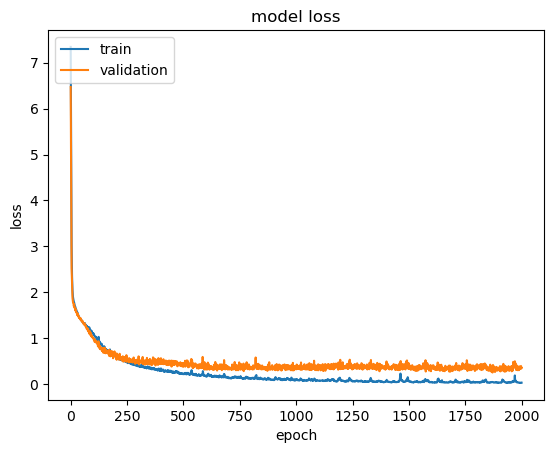

In [35]:

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

# Conclusion

The accuracy of the first datast is 33%, while the second is 55%. This indicates that adding more features increases accuracy and performance, and this is what we will do in the future. We will increase the number of features and the number of samples.